In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df= pd.read_csv('/content/Data.csv')

In [6]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [7]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
df= df.drop(columns=['Sample code number'])

In [9]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [10]:
df.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


<Axes: >

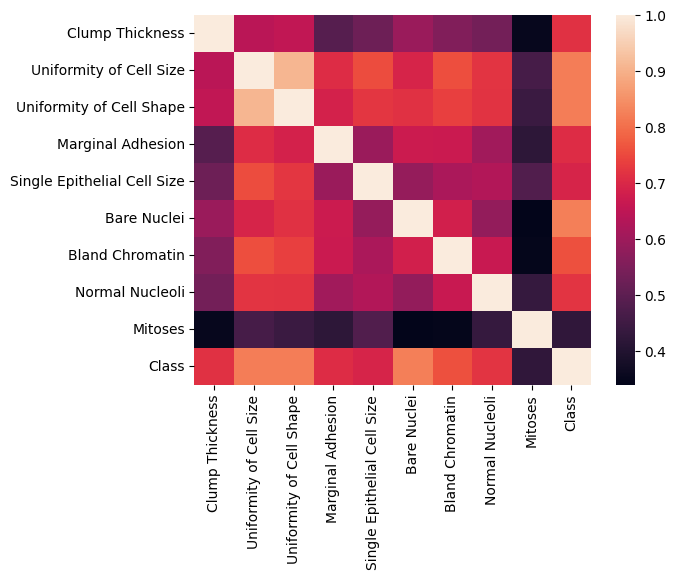

In [11]:
sns.heatmap(df.corr())


In [12]:
df= df.drop(columns=['Mitoses'])

In [13]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

#logistic

In [15]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [16]:
y1_pred= lg.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1= confusion_matrix(y_test,y1_pred)
print(cm1)
accuracy_score(y_test,y1_pred)

[[84  3]
 [ 5 45]]


0.9416058394160584

#knn

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5, weights='uniform', metric= 'minkowski', p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
y2_pred= knn.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm2= confusion_matrix(y_test,y2_pred)
print(cm2)
accuracy_score(y_test,y2_pred)

[[84  3]
 [ 2 48]]


0.9635036496350365

#DT

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='entropy', random_state= 0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
y3_pred= dt.predict(X_test)

In [24]:
cm3= confusion_matrix(y_test,y3_pred)
print(cm3)
accuracy_score(y_test,y3_pred)

[[85  2]
 [ 3 47]]


0.9635036496350365

#randomforest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [26]:
y4_pred= rf.predict(X_test)

In [27]:
cm4= confusion_matrix(y_test,y4_pred)
print(cm3)
accuracy_score(y_test,y4_pred)

[[85  2]
 [ 3 47]]


0.9708029197080292

#svm

In [34]:
from sklearn.svm import SVC
svm= SVC(kernel='rbf', random_state=0)
svm.fit(X_train,y_train)

SVC(random_state=0)

In [35]:
y5_pred= svm.predict(X_test)

In [36]:
cm5= confusion_matrix(y_test,y5_pred)
print(cm5)
accuracy_score(y_test,y5_pred)

[[83  4]
 [ 2 48]]


0.9562043795620438

#naiveBayes

In [37]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [38]:
y6_pred= nb.predict(X_test)

In [39]:
cm6=confusion_matrix(y_test,y6_pred)
print(cm6)
accuracy_score(y_test,y6_pred)

[[81  6]
 [ 0 50]]


0.9562043795620438

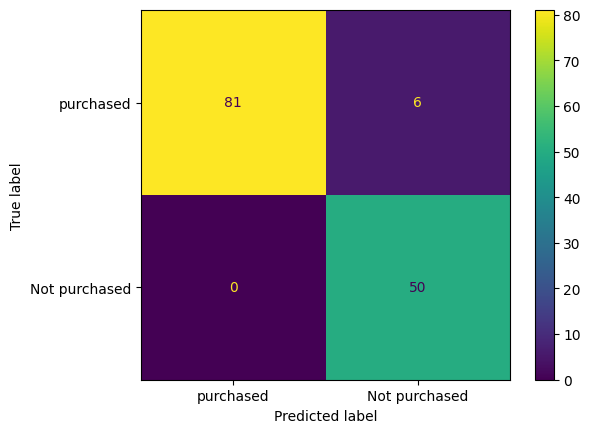

In [42]:
labels = ["purchased", "Not purchased"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm6, display_labels=labels)
disp.plot();